In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss

In [2]:
coins = ['USDP', 'DAI', 'FDUSD', 'USDC', 'USDT', 'PYUSD']
dataframes = []

for coin in coins:
    filename = f'{coin}_All_graph_coinmarketcap.csv'
    df = pd.read_csv(filename, delimiter=';')
    df = df[['close', 'volume', 'marketCap', 'timestamp']]
    dataframes.append(df)

usdp, dai, fdusd, usdc, usdt, pyusd = dataframes

for df in dataframes:
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True, format='ISO8601').dt.date

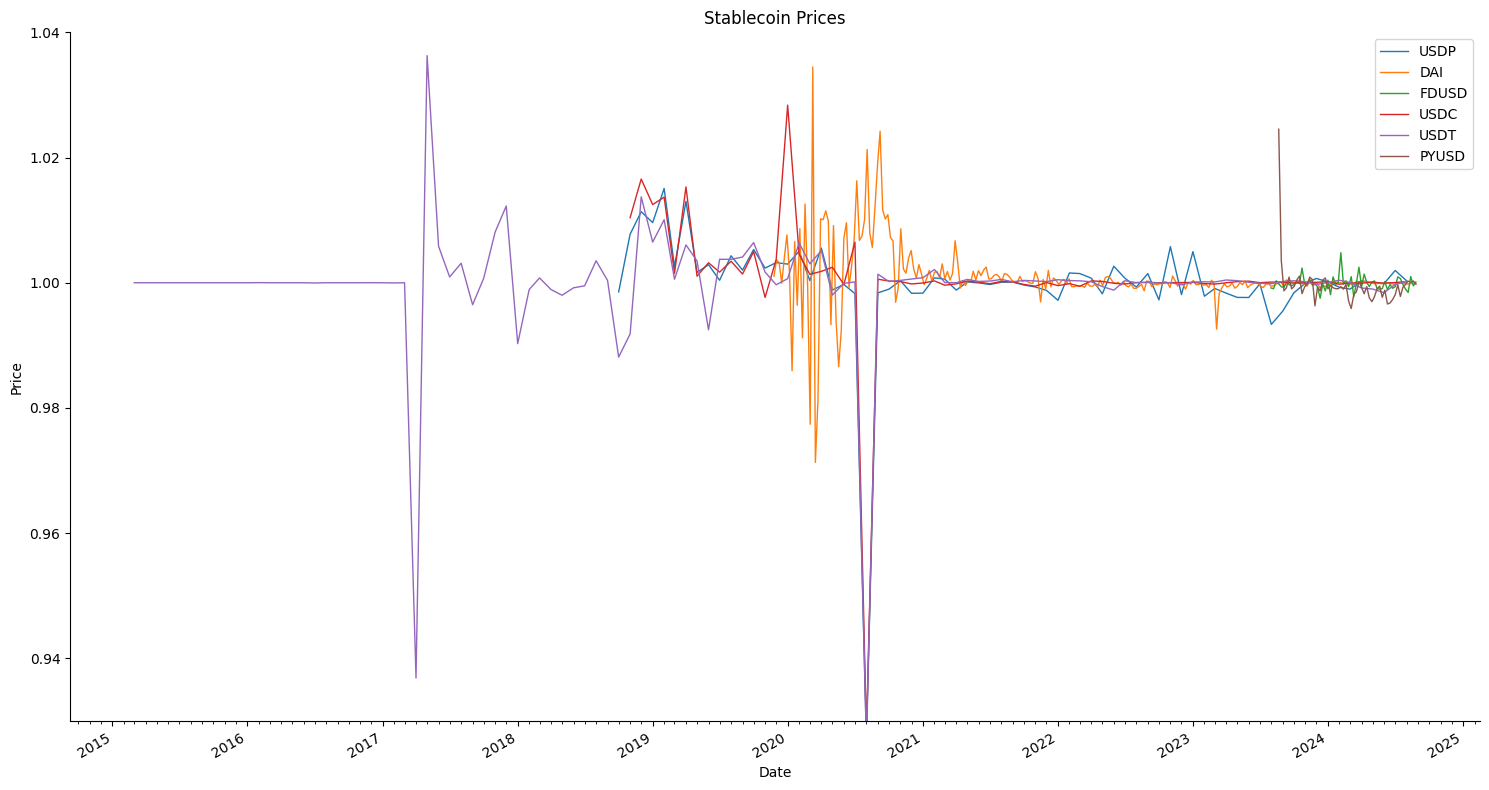

In [3]:
fig, ax = plt.subplots(figsize=(15, 8))

for df, name in zip(dataframes, coins):
    ax.plot(df['timestamp'], df['close'], label=name, linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stablecoin Prices')
ax.legend()

ax.set_ylim(0.93, 1.04)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

fig.autofmt_xdate()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

In [4]:
vols = []

for df in dataframes:
    vols.append(df['close'].std())

usdp_vol, dai_vol, fdusd_vol, usdc_vol, usdt_vol, pyusd_vol = vols

In [5]:
vols_table = pd.DataFrame({'Coin': coins, 'Volatility': vols})
display(vols_table)

,Coin,Volatility
0,USDP,0.009568
1,DAI,0.005409
2,FDUSD,0.001127
3,USDC,0.010089
4,USDT,0.010239
5,PYUSD,0.003725


In [6]:
for df, coin in zip(dataframes, coins):
    adf = adfuller(df['close'])
    kpss_result = kpss(df['close'])
    print(f'{coin} ADF Statistic: {adf[0]}')
    print(f'p-value: {adf[1]}')
    print(f'{coin} KPSS Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    print()

USDP ADF Statistic: -7.343076565812203
p-value: 1.0527078157469714e-10
USDP KPSS Statistic: 0.19823324707073844
p-value: 0.1

DAI ADF Statistic: -3.4710442663600576
p-value: 0.008762633966551912
DAI KPSS Statistic: 0.7947379318972942
p-value: 0.01

FDUSD ADF Statistic: -8.044471316896804
p-value: 1.8100559557727692e-12
FDUSD KPSS Statistic: 0.07448871197571245
p-value: 0.1

USDC ADF Statistic: -7.880840274033025
p-value: 4.707631273284204e-12
USDC KPSS Statistic: 0.29185744074983516
p-value: 0.1

USDT ADF Statistic: -12.48515452064473
p-value: 3.030147186362416e-23
USDT KPSS Statistic: 0.03917810226574802
p-value: 0.1

PYUSD ADF Statistic: -2.2568264052175953
p-value: 0.18627043222257827
PYUSD KPSS Statistic: 0.5714269278752282
p-value: 0.02557952074882247



/var/folders/fy/tvcylj6s5vb1kwcy88vnrjh40000gn/T/ipykernel_9579/3581763998.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['close'])
/var/folders/fy/tvcylj6s5vb1kwcy88vnrjh40000gn/T/ipykernel_9579/3581763998.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['close'])
/var/folders/fy/tvcylj6s5vb1kwcy88vnrjh40000gn/T/ipykernel_9579/3581763998.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['close'])
/var/folders/fy/tvcylj6s5vb1kwcy88vnrjh40000gn/T/ipykernel_9579/3581763998.py:3: InterpolationWarning: The test statistic is outside of the range of p-val

In [7]:
start_date = pd.Timestamp('08-01-2023').date()
end_date = pd.Timestamp('08-01-2024').date()

filtered_dataframes = []

for df, coin in zip(dataframes, coins):
    filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
    filtered_dataframes.append(filtered_df)

usdp_filtered, dai_filtered, fdusd_filtered, usdc_filtered, usdt_filtered, pyusd_filtered = filtered_dataframes

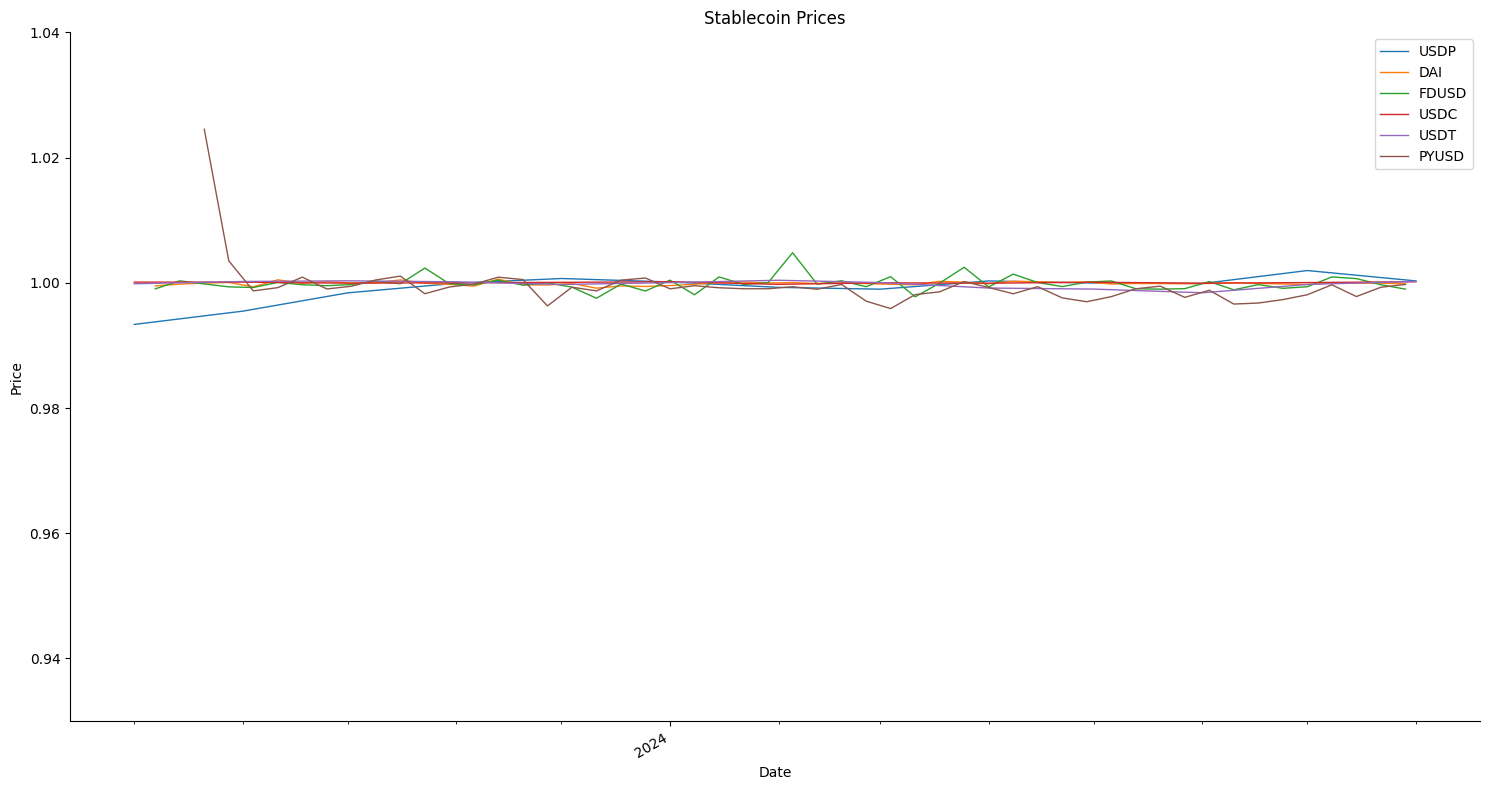

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))

for df, name in zip(filtered_dataframes, coins):
    ax.plot(df['timestamp'], df['close'], label=name, linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stablecoin Prices')
ax.legend()

ax.set_ylim(0.93, 1.04)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

fig.autofmt_xdate()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()